##  *Client Subscription Prediction*

## Business Understanding 
##### *Problem Statement*

The goal is to improve the success rate of direct marketing campaigns by identifying factors that influence a client's decision to subscribe to a term deposit. This involves understanding client demographics, campaign characteristics, and historical engagement.

##### *Business Objective*

Increase Conversion Rates: Identify clients more likely to subscribe to a term deposit to optimize marketing efforts.

Resource Allocation: Minimize unnecessary calls to unlikely prospects, reducing costs.

Customer Insights: Gain a deeper understanding of client profiles and preferences for future campaigns.

##### *Key Business Questions*

1. Which client demographics (e.g., age, job, marital status, education) are associated with a higher likelihood of subscribing to a term deposit?

2. How do campaign-related factors (e.g., number of calls, duration of contact) impact conversion?
3. What role does previous engagement and its outcome play in current campaign success?
4. Can we predict the likelihood of subscription   based on client and campaign data?

#### *Hypothesis Statement*:
#### H₀ (Null Hypothesis):
Client characteristics (e.g., age, job, marital status, education), financial details, and campaign attributes do not significantly influence the likelihood of subscribing to a term deposit.

#### H₁ (Alternative Hypothesis):
Client characteristics, financial details, and campaign attributes significantly influence the likelihood of subscribing to a term deposit.

## *Data Understanding*

### *Key Features*

##### *Client Demographics:*

##### Age (numeric): 
Provides insights into the age distribution of subscribers.
Job (categorical): Employment type may influence financial behavior.
Marital Status (categorical): Indicates household financial decisions.
Education Level (categorical): Reflects financial literacy and potential income levels.

#### Financial Information:

Default (binary): Indicates credit risk.
Balance (numeric): Average yearly balance offers a financial capability metric.
Housing Loan and Personal Loan (binary): Reflects current financial obligations.

#### Campaign Details:

Contact Method (categorical): Effectiveness of communication channels.
Day and Month of Contact: Timing trends for successful engagements.
Duration of Last Contact: Directly correlated with success (as longer calls often indicate interest).
Number of Contacts in Campaign (numeric): May indicate persistence levels.

#### Historical Campaign Data:

Days Since Last Contact (pdays): Recency of prior engagements.
Previous Contacts (previous): Frequency of earlier interactions.
Outcome of Previous Campaign (poutcome): Past success or failure trends.

#### Target Variable:

y (binary): Indicates whether the client subscribed to the term deposit (yes or no).


#### *Success Criteria*  
A Predictive model with high accuracy, precision and recall for identifying potential Subscriber 

###  Import Libraries

In [1]:
#data manipulation libraries
import pandas as pd
import numpy as np 

#data visualization libraries 
import matplotlib.pyplot as plt
import seaborn as sns 

#statistics libraries 
from scipy import stats
import statistics as stat
from scipy.stats import chi2_contingency,mannwhitneyu

#machine learning libraries 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder,RobustScaler,OneHotEncoder,FunctionTransformer,PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.pipeline import Pipeline as imbPipeline
from sklearn.feature_selection import SelectKBest ,mutual_info_classif
from sklearn.metrics import auc,roc_curve

import joblib 
import os


# hide warning
import warnings
warnings.filterwarnings('ignore')



In [7]:
# Load dataset
train_data= pd.read_csv('C:/Users/HP-PC/OneDrive - Azubi Africa/my azubi africa career accelerator projects/Predictive-Analysis-for-Client-Subscription/Data/bank-full.csv', delimiter=';')
train_data.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [9]:
train_df = pd.DataFrame(train_data)
train_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [10]:
test_data= pd.read_csv('C:/Users/HP-PC/OneDrive - Azubi Africa/my azubi africa career accelerator projects/Predictive-Analysis-for-Client-Subscription/Data/bank.csv', delimiter=';')
test_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


#### Data Quality Assessment 
##### Exploratory Analysis

In [11]:
# for train data
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [12]:
train_df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [14]:
train_df.duplicated().sum()


np.int64(0)

In [15]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [17]:
# print out columns
columns =train_df.columns
columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [18]:
#checking for unique values
for column in columns:
    print(f"{column}")
    print(f"There are {train_df[column].nunique()} unique values")
    print(f'{train_df[column].unique()}')
    print('-' * 50)

age
There are 77 unique values
[58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]
--------------------------------------------------
job
There are 12 unique values
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
--------------------------------------------------
marital
There are 3 unique values
['married' 'single' 'divorced']
--------------------------------------------------
education
There are 4 unique values
['tertiary' 'secondary' 'unknown' 'primary']
--------------------------------------------------
default
There are 2 unique values
['no' 'yes']
--------------------------------------------------
balance
There are 7168 unique values
[ 2143    29     2 ...  8205 14204 16353]
------------------------

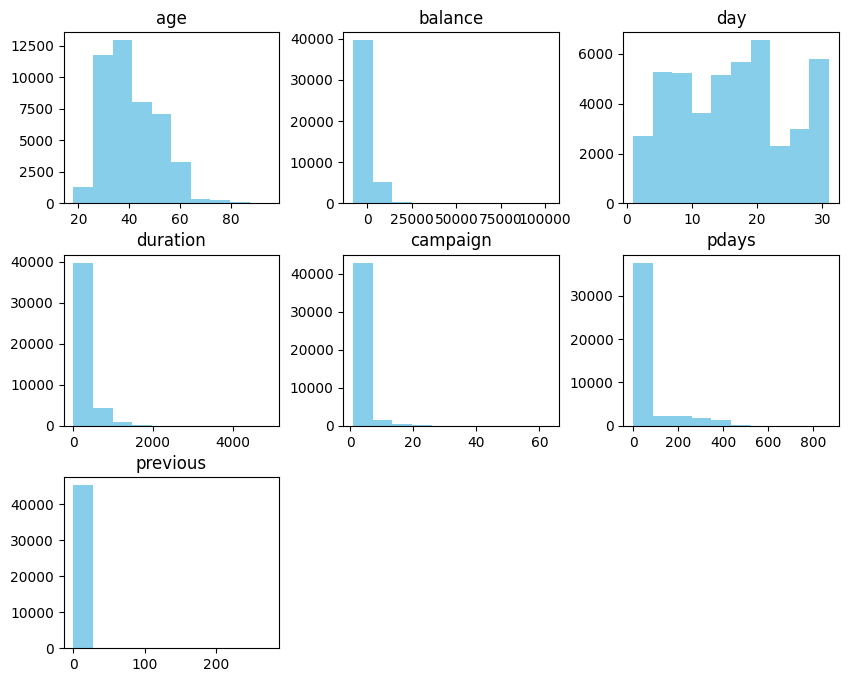

In [19]:
# visualizing the distribution of the numeric columns
train_df.hist(figsize=(10,8),grid=False,color='skyblue')
plt.show()

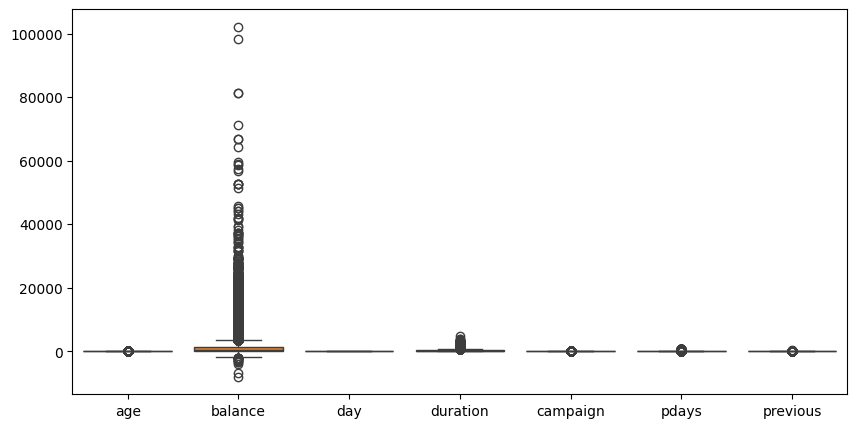

In [21]:
plt.figure(figsize=(10,5))
sns.boxplot(train_df)
plt.show()

Sub Value Counts: y
no     39922
yes     5289
Name: count, dtype: int64
sub Rate: 0.0


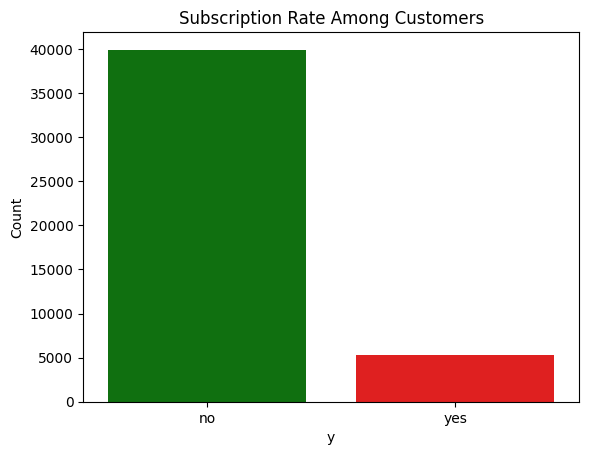

In [26]:
# calculate number of customers who have subscribed and who have not
sub_value_counts = train_df['y'].value_counts()
print("Sub Value Counts:", sub_value_counts)
# Calculate the total number of customers
total_customers = len(train_df)

# Calculate the number of Subscribers
subscribers = len(train_df.loc[train_df['y'] == 'Yes'])

# Calculate the sub rate
sub_rate = (subscribers / total_customers) * 100

print("sub Rate:", sub_rate)
# reset index
#train_df.reset_index(inplace=True)
# distribution of subscribers

sns.countplot(x='y',data=train_df,color='blue', palette={'yes': 'red', 'no': 'green'})
plt.title('Subscription Rate Among Customers')
plt.xlabel('y')
plt.ylabel('Count')
plt.show()